In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loading data into dataframes
data1 = pd.read_csv("E:\Surendra Data\DATA Scientist Course Detail\Internship\Capstone Project\Data\Data1.csv")
data2 = pd.read_csv("E:\Surendra Data\DATA Scientist Course Detail\Internship\Capstone Project\Data\Data2.csv")
data3 = pd.read_csv("E:\Surendra Data\DATA Scientist Course Detail\Internship\Capstone Project\Data\Data3.csv")

#### First five rows of all 3 dataframes.

In [3]:
data1.head()

,Sno,Hotel Name,City,Location,Number of Reviews,User Ratings,Star Rating,Review Score
0,1,Days Hotel By Wyndham Dubai Deira,Dubai,One Deira Plaza Gold Souk Metro Station Al Cor...,"4,049",8.1,3,Very good
1,2,Four Points by Sheraton Sheikh Zayed Road,Dubai,"Sheikh Zayed Road, Trade Centre, Dubai, United...","2,926",8.4,4,Very good
2,3,1 World Dubai,Dubai,King Salman Bin Abdulaziz Al Saud Street Elite...,695,8.6,0,Fabulous
3,4,"Holiday Inn Express Dubai Airport, an IHG Hotel",Dubai,"Airport Road, Garhoud, 35257 Dubai, United Ara...","16,649",7.8,3,Good
4,5,One bedroom apartment with amazing pool view i...,Dubai,"Apartment no 902, Building name tower 108, JVC...",-,-,0,-


In [4]:
data1.drop('Sno', axis=1, inplace=True)
data1.columns

Index(['Hotel Name', 'City', 'Location', 'Number of Reviews', 'User Ratings',
       'Star Rating', 'Review Score'],
      dtype='object')

In [5]:
data1.isnull().sum()

Hotel Name           0
City                 0
Location             0
Number of Reviews    0
User Ratings         0
Star Rating          0
Review Score         0
dtype: int64

In [6]:
data2.head()

,Sno,Hotel Name,Freewifi,Family Rooms,Non-Smoking Rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine1,Breakfast Cuisine2,Breakfast Cuisine3
0,1,Days Hotel By Wyndham Dubai Deira,No,Yes,Yes,No,No,No,No,"Continental,","Italian,",Full
1,2,Four Points by Sheraton Sheikh Zayed Road,No,Yes,Yes,No,Yes,No,Yes,"Continental,","Vegetarian,","Halal,"
2,3,1 World Dubai,No,No,Yes,No,No,Yes,Yes,-,-,-
3,4,"Holiday Inn Express Dubai Airport, an IHG Hotel",No,No,Yes,No,Yes,No,Yes,"Continental,","Italian,","Vegetarian,"
4,5,One bedroom apartment with amazing pool view i...,No,Yes,No,No,No,Yes,Yes,-,-,-


In [7]:
data2.drop(['Sno','Hotel Name'], axis=1, inplace=True)
data2.columns

Index(['Freewifi', 'Family Rooms', 'Non-Smoking Rooms', 'Restaurant', 'Bar',
       'Heating', 'Lift', 'Breakfast Cuisine1', 'Breakfast Cuisine2',
       'Breakfast Cuisine3'],
      dtype='object')

In [8]:
data3.head()

,Sno,Hotel Name,Room Type,Doublebed,Singlebed,Prices
0,1,Days Hotel By Wyndham Dubai Deira,"Superior Queen Room, City View, 25% off Spa",No,No,10069
1,2,Four Points by Sheraton Sheikh Zayed Road,Classic Twin Room with Balcony - Complimentary...,No,No,29443
2,3,1 World Dubai,Single Bed in 4-Bed Dormitory Room,No,No,6772
3,4,"Holiday Inn Express Dubai Airport, an IHG Hotel",Double Room Free Shuttle Bus to Airport Termin...,No,No,11302
4,5,One bedroom apartment with amazing pool view i...,One-Bedroom Apartment,No,No,13249


In [9]:
data3.drop(['Sno','Hotel Name'], axis=1, inplace=True)
data3.columns

Index(['Room Type', 'Doublebed', 'Singlebed', 'Prices'], dtype='object')

#### Concatenating the dataframes to make 1 dataframe

In [10]:
# Concatenate horizontally (along columns)
hotel_data = pd.concat([data1, data2, data3], axis=1)

In [11]:
hotel_data.shape

(2750, 21)

In [12]:
hotel_data.columns

Index(['Hotel Name', 'City', 'Location', 'Number of Reviews', 'User Ratings',
       'Star Rating', 'Review Score', 'Freewifi', 'Family Rooms',
       'Non-Smoking Rooms', 'Restaurant', 'Bar', 'Heating', 'Lift',
       'Breakfast Cuisine1', 'Breakfast Cuisine2', 'Breakfast Cuisine3',
       'Room Type', 'Doublebed', 'Singlebed', 'Prices'],
      dtype='object')

In [13]:
# checking the dtypes of columns
hotel_data.dtypes

Hotel Name            object
City                  object
Location              object
Number of Reviews     object
User Ratings          object
Star Rating            int64
Review Score          object
Freewifi              object
Family Rooms          object
Non-Smoking Rooms     object
Restaurant            object
Bar                   object
Heating               object
Lift                  object
Breakfast Cuisine1    object
Breakfast Cuisine2    object
Breakfast Cuisine3    object
Room Type             object
Doublebed             object
Singlebed             object
Prices                object
dtype: object

#### Data Cleaning

We will change the Numberofreviews, Userratings, Prices column dtypes from object to int.

In [14]:
# Convert 'Number of reviews' , 'Prices' and 'User ratings' to int
hotel_data['Number of Reviews'] = pd.to_numeric(hotel_data['Number of Reviews'].str.replace(',', ''), errors='coerce', downcast='integer').fillna(0)
hotel_data['User Ratings'] = pd.to_numeric(hotel_data['User Ratings'], errors='coerce')
hotel_data['Prices'] = pd.to_numeric(hotel_data['Prices'], errors='coerce')

In [15]:
# checking the column dtypes again
hotel_data.dtypes

Hotel Name             object
City                   object
Location               object
Number of Reviews     float64
User Ratings          float64
Star Rating             int64
Review Score           object
Freewifi               object
Family Rooms           object
Non-Smoking Rooms      object
Restaurant             object
Bar                    object
Heating                object
Lift                   object
Breakfast Cuisine1     object
Breakfast Cuisine2     object
Breakfast Cuisine3     object
Room Type              object
Doublebed              object
Singlebed              object
Prices                float64
dtype: object

In [16]:
# checking the number of unique hotel names
hotel_data['Hotel Name'].value_counts()

Native Manchester                                        3
One Bedroom at Manchester, Old Trafford                  3
25hours Hotel Bikini Berlin                              2
Gorgeous 4 bedroom house with indoor fireplace           2
Downtown High-rise Condo- CN Tower View                  2
                                                        ..
Elsham Gardens Rooms - PnG Suite                         1
The Edwardian Manchester, A Radisson Collection Hotel    1
1 Bed Central Apt with Balcony and Free Parking          1
Pillo Rooms - Abbey Grove                                1
plat hostel keikyu asakusa karin                         1
Name: Hotel Name, Length: 2590, dtype: int64

This shows that many of the hotel are repeated in the datsett and only 2590 unique values are present. We will drop these duplicated values.

In [17]:
# dropping duplicates
hotel_data.drop_duplicates(subset='Hotel Name', keep='first', inplace=True)

In [18]:
hotel_data.shape

(2590, 21)

In [19]:
# Identify object columns and apply the strip method
object_columns = hotel_data.select_dtypes(include=['object']).columns
hotel_data[object_columns] = hotel_data[object_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Display the cleaned DataFrame
hotel_data.head()

,Hotel Name,City,Location,Number of Reviews,User Ratings,Star Rating,Review Score,Freewifi,Family Rooms,Non-Smoking Rooms,...,Bar,Heating,Lift,Breakfast Cuisine1,Breakfast Cuisine2,Breakfast Cuisine3,Room Type,Doublebed,Singlebed,Prices
0,Days Hotel By Wyndham Dubai Deira,Dubai,One Deira Plaza Gold Souk Metro Station Al Cor...,4049.0,8.1,3,Very good,No,Yes,Yes,...,No,No,No,"Continental,","Italian,",Full,"Superior Queen Room, City View, 25% off Spa",No,No,10069.0
1,Four Points by Sheraton Sheikh Zayed Road,Dubai,"Sheikh Zayed Road, Trade Centre, Dubai, United...",2926.0,8.4,4,Very good,No,Yes,Yes,...,Yes,No,Yes,"Continental,","Vegetarian,","Halal,",Classic Twin Room with Balcony - Complimentary...,No,No,29443.0
2,1 World Dubai,Dubai,King Salman Bin Abdulaziz Al Saud Street Elite...,695.0,8.6,0,Fabulous,No,No,Yes,...,No,Yes,Yes,-,-,-,Single Bed in 4-Bed Dormitory Room,No,No,6772.0
3,"Holiday Inn Express Dubai Airport, an IHG Hotel",Dubai,"Airport Road, Garhoud, 35257 Dubai, United Ara...",16649.0,7.8,3,Good,No,No,Yes,...,Yes,No,Yes,"Continental,","Italian,","Vegetarian,",Double Room Free Shuttle Bus to Airport Termin...,No,No,11302.0
4,One bedroom apartment with amazing pool view i...,Dubai,"Apartment no 902, Building name tower 108, JVC...",0.0,NaN,0,-,No,Yes,No,...,No,Yes,Yes,-,-,-,One-Bedroom Apartment,No,No,13249.0


In [20]:
# checking for value counts for columns
hotel_data['Review Score'].value_counts()

Good             783
Very good        762
Fabulous         350
Superb           180
Pleasant         168
-                155
Exceptional       90
Passable          67
Disappointing     24
Poor               5
Bad                3
Very poor          3
Name: Review Score, dtype: int64

In [21]:
hotel_data['User Ratings'].value_counts()

8.2    148
8.1    128
7.8    126
8.3    124
8.0    124
      ... 
3.8      1
3.4      1
4.5      1
3.7      1
3.5      1
Name: User Ratings, Length: 66, dtype: int64

We will fill the blank value in the Reviewscore column based on their Userratings column value

In [22]:
# Define a function to map '-' values based on 'Userratings'
def map_reviewscore(row):
    if row['Review Score'] == '-':
        if row['User Ratings'] >= 7.0:
            return 'Very good'
        elif 3.5 <= row['User Ratings'] < 6.9:
            return 'Good'
        else:
            return 'Bad'
    return row['Review Score']

# Apply the function to update 'Reviewscore'
hotel_data['Review Score'] = hotel_data.apply(map_reviewscore, axis=1)

In [23]:
# checking the value counts of reviewscore column again
hotel_data['Review Score'].value_counts()

Good             783
Very good        762
Fabulous         350
Superb           180
Pleasant         168
Bad              158
Exceptional       90
Passable          67
Disappointing     24
Poor               5
Very poor          3
Name: Review Score, dtype: int64

In [24]:
hotel_data['Review Score'] = hotel_data['Review Score'].replace(['Passable', 'Very poor'], 'Poor')

In [25]:
hotel_data['Star Rating'].value_counts()

4    920
3    776
0    504
5    270
2    100
1     20
Name: Star Rating, dtype: int64

In [26]:
hotel_data['Freewifi'].value_counts()

No    2590
Name: Freewifi, dtype: int64

In [27]:
hotel_data['Family Rooms'].value_counts()

Yes    1495
No     1095
Name: Family Rooms, dtype: int64

In [28]:
hotel_data['Non-Smoking Rooms'].value_counts()

Yes    2195
No      395
Name: Non-Smoking Rooms, dtype: int64

In [29]:
hotel_data['Bar'].value_counts()

No     1481
Yes    1109
Name: Bar, dtype: int64

In [30]:
hotel_data['Restaurant'].value_counts()

No    2590
Name: Restaurant, dtype: int64

In [31]:
hotel_data['Heating'].value_counts()

Yes    2176
No      414
Name: Heating, dtype: int64

In [32]:
hotel_data['Lift'].value_counts()

Yes    1750
No      840
Name: Lift, dtype: int64

In [33]:
hotel_data['Breakfast Cuisine1'].value_counts()

-               1403
Continental,     533
Continental      272
Full             128
Buffet            70
Vegetarian,       67
American          39
Asian,            19
Asian             14
Halal,            11
Breakfast         10
Vegetarian         5
Halal              4
Gluten-free        4
Vegan,             2
Gluten-free,       2
American,          2
Italian,           2
Buffet,            1
Vegan              1
Italian            1
Name: Breakfast Cuisine1, dtype: int64

In [34]:
# removing ',' from BreakfastCuisine1 value
hotel_data['Breakfast Cuisine1'] = hotel_data['Breakfast Cuisine1'].str.replace(',', '')

In [35]:
hotel_data['Breakfast Cuisine1'].value_counts()

-              1403
Continental     805
Full            128
Vegetarian       72
Buffet           71
American         41
Asian            33
Halal            15
Breakfast        10
Gluten-free       6
Vegan             3
Italian           3
Name: Breakfast Cuisine1, dtype: int64

In [36]:
# replace '-' with 'Continental' since it is the most common breakfast option available
hotel_data['Breakfast Cuisine1'] = hotel_data['Breakfast Cuisine1'].replace('-','Continental')

In [37]:
hotel_data['Breakfast Cuisine2'].value_counts()

-                 1813
Full               192
Vegetarian,        161
English/Irish,      66
English/Irish       62
American            59
Buffet              36
Vegan,              35
Gluten-free         31
Italian,            25
Vegetarian          21
Halal,              16
Asian,              15
Gluten-free,        13
to                  10
Halal                9
Asian                8
Breakfast            6
Vegan                6
American,            5
Italian              1
Name: Breakfast Cuisine2, dtype: int64

In [38]:
# removing ',' from BreakfastCuisine2 value
hotel_data['Breakfast Cuisine2'] = hotel_data['Breakfast Cuisine2'].str.replace(',', '')
hotel_data['Breakfast Cuisine2'].value_counts()

-                1813
Full              192
Vegetarian        182
English/Irish     128
American           64
Gluten-free        44
Vegan              41
Buffet             36
Italian            26
Halal              25
Asian              23
to                 10
Breakfast           6
Name: Breakfast Cuisine2, dtype: int64

In [39]:
hotel_data['Breakfast Cuisine3'].value_counts()

-                 2046
English/Irish,     156
Vegan,              63
Vegetarian,         49
Gluten-free         46
Halal,              40
American            37
English/Irish       36
Gluten-free,        24
Buffet              17
Full                16
Vegetarian          10
go                  10
Vegan                9
Halal                7
Asian,               7
to                   6
Asian                5
American,            3
Breakfast            2
Buffet,              1
Name: Breakfast Cuisine3, dtype: int64

In [40]:
# removing ',' from BreakfastCuisine3 value
hotel_data['Breakfast Cuisine3'] = hotel_data['Breakfast Cuisine3'].str.replace(',', '')
hotel_data['Breakfast Cuisine3'].value_counts()

-                2046
English/Irish     192
Vegan              72
Gluten-free        70
Vegetarian         59
Halal              47
American           40
Buffet             18
Full               16
Asian              12
go                 10
to                  6
Breakfast           2
Name: Breakfast Cuisine3, dtype: int64

We can see that most of the values in these two columns 'BreakfastCuisine2' and 'BreakfastCuisine3' are balnk. so we will drop the columns.

In [41]:
hotel_data.drop(['Breakfast Cuisine2','Breakfast Cuisine3'], axis=1, inplace=True)

In [42]:
hotel_data['Doublebed'].value_counts()

No    2590
Name: Doublebed, dtype: int64

In [43]:
hotel_data['Singlebed'].value_counts()

No    2590
Name: Singlebed, dtype: int64

In [44]:
# dropping the doublebed, singlebed, freewifi and restaurant column since they contain only single value
hotel_data.drop(['Doublebed', 'Singlebed', 'Freewifi', 'Restaurant'], axis=1, inplace=True)

In [45]:
hotel_data.columns

Index(['Hotel Name', 'City', 'Location', 'Number of Reviews', 'User Ratings',
       'Star Rating', 'Review Score', 'Family Rooms', 'Non-Smoking Rooms',
       'Bar', 'Heating', 'Lift', 'Breakfast Cuisine1', 'Room Type', 'Prices'],
      dtype='object')

In [46]:
# value counts for city column
hotel_data['City'].value_counts()

Paris           250
Berlin          247
London          243
Tokyo           242
Melbourne       233
Dubai           232
Kuala Lumpur    232
Birmingham      232
Sydney          232
Manchester      227
Toronto         219
-                 1
Name: City, dtype: int64

#### EDA

In [47]:
hotel_data.shape

(2590, 15)

In [48]:
# checking for Nan values
hotel_data.isnull().sum()

Hotel Name              0
City                    0
Location                0
Number of Reviews       0
User Ratings          155
Star Rating             0
Review Score            0
Family Rooms            0
Non-Smoking Rooms       0
Bar                     0
Heating                 0
Lift                    0
Breakfast Cuisine1      0
Room Type               0
Prices                 13
dtype: int64

In [49]:
hotel_data[hotel_data['User Ratings'].isna()]

,Hotel Name,City,Location,Number of Reviews,User Ratings,Star Rating,Review Score,Family Rooms,Non-Smoking Rooms,Bar,Heating,Lift,Breakfast Cuisine1,Room Type,Prices
4,One bedroom apartment with amazing pool view i...,Dubai,"Apartment no 902, Building name tower 108, JVC...",0.0,NaN,0,Bad,Yes,No,No,Yes,Yes,Continental,One-Bedroom Apartment,13249.0
15,Damac Tower 108 - JVC - 1BHK - Ezytrac Vacatio...,Dubai,"Tower 108, Dubai, United Arab Emirates",0.0,NaN,4,Bad,No,No,No,No,Yes,Continental,One-Bedroom Apartment,6088.0
25,Modern Urban Escape Studio Gem,Dubai,"2/1, 6 Street, Dubailand Residence Complex, Wa...",0.0,NaN,0,Bad,No,No,No,No,Yes,Continental,Queen Studio,7474.0
26,Newly Built Luxury Apt - Pool,Dubai,"2/1, 6 Street, Dubailand Residence Complex, Wa...",0.0,NaN,4,Bad,No,No,No,Yes,No,Continental,Holiday Home,7474.0
28,花仙子,Dubai,"International city phase 2, Dubai, United Arab...",0.0,NaN,0,Bad,No,No,No,No,No,Continental,One-Bedroom Apartment,5707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,4 Bedroom 3 bathroom 6 queen bed 5 full floor ...,Toronto,"113 Markham Street, M6J 2G4 Toronto, Canada",0.0,NaN,3,Bad,Yes,No,No,Yes,No,Continental,Four-Bedroom House,27161.0
2463,Downtown Toronto Jewel: Captivating Skyline View!,Toronto,"75 Queens Wharf Road, M5V 0J8 Toronto, Canada",0.0,NaN,3,Bad,Yes,Yes,No,Yes,Yes,Continental,One-Bedroom Apartment,14447.0
2529,Mercure Tokyo Haneda Airport,Tokyo,"144-0043 Tokyo-to, Ota-ku Haneda 1-2-11, Japan",0.0,NaN,4,Bad,No,Yes,Yes,Yes,Yes,Buffet,Superior King Room - Non-smoking,9155.0
2530,Lucky Hotel,Tokyo,"169-0073 Tokyo-to, 百人町１-17-13, Japan",0.0,NaN,0,Bad,No,Yes,No,No,No,Continental,Small Double Room,3496.0


we can see that the Reviewscore for hotel with Nan Userratings is bad. We will replace this nan value with a rating of 3.

In [50]:
# Fill missing values in 'Userratings' with 3
hotel_data['User Ratings'] = hotel_data['User Ratings'].fillna(3)

In [51]:
hotel_data[(hotel_data['City'] == '-') | hotel_data['City'].isna()]

,Hotel Name,City,Location,Number of Reviews,User Ratings,Star Rating,Review Score,Family Rooms,Non-Smoking Rooms,Bar,Heating,Lift,Breakfast Cuisine1,Room Type,Prices
1965,-,-,-,0.0,3.0,0,Bad,No,No,No,No,No,Continental,-,NaN


We will drop the row with city name = '-' and replace the null value with 'Melbourne'.

In [52]:
# Drop rows where city is '-'
hotel_data = hotel_data.drop(hotel_data[hotel_data['City'] == '-'].index)

In [53]:
# replacing the null value in city column
hotel_data['City'] = hotel_data['City'].fillna('Berlin')

In [54]:
# we will replace the null values in price column with mean value of the column
hotel_data['Prices'] = hotel_data['Prices'].fillna(hotel_data['Prices'].mean())

In [55]:
# checking for null values again
hotel_data.isnull().sum()

Hotel Name            0
City                  0
Location              0
Number of Reviews     0
User Ratings          0
Star Rating           0
Review Score          0
Family Rooms          0
Non-Smoking Rooms     0
Bar                   0
Heating               0
Lift                  0
Breakfast Cuisine1    0
Room Type             0
Prices                0
dtype: int64

In [56]:
# checking the summary statistics
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 0 to 2749
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel Name          2589 non-null   object 
 1   City                2589 non-null   object 
 2   Location            2589 non-null   object 
 3   Number of Reviews   2589 non-null   float64
 4   User Ratings        2589 non-null   float64
 5   Star Rating         2589 non-null   int64  
 6   Review Score        2589 non-null   object 
 7   Family Rooms        2589 non-null   object 
 8   Non-Smoking Rooms   2589 non-null   object 
 9   Bar                 2589 non-null   object 
 10  Heating             2589 non-null   object 
 11  Lift                2589 non-null   object 
 12  Breakfast Cuisine1  2589 non-null   object 
 13  Room Type           2589 non-null   object 
 14  Prices              2589 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 323.6

In [57]:
# lets check for unique values in each column
hotel_data.nunique()

Hotel Name            2589
City                    11
Location              2489
Number of Reviews     1586
User Ratings            66
Star Rating              6
Review Score             9
Family Rooms             2
Non-Smoking Rooms        2
Bar                      2
Heating                  2
Lift                     2
Breakfast Cuisine1      11
Room Type              739
Prices                1740
dtype: int64

In [58]:
print("=== Summary Statistics ===")
print()
print(hotel_data.describe())

=== Summary Statistics ===

       Number of Reviews  User Ratings  Star Rating        Prices
count        2589.000000   2589.000000  2589.000000  2.589000e+03
mean         1610.306296      7.658440     2.926999  1.499081e+04
std          2429.468759      1.522587     1.608181  4.837282e+04
min             0.000000      1.000000     0.000000  5.220000e+02
25%            58.000000      7.400000     3.000000  7.072000e+03
50%           770.000000      8.000000     3.000000  1.150200e+04
75%          2084.000000      8.500000     4.000000  1.752500e+04
max         28907.000000     10.000000     5.000000  2.377105e+06


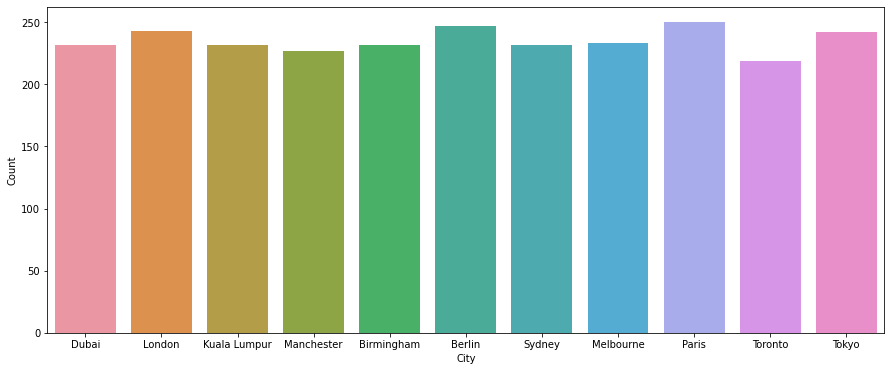

In [59]:
# Plotting barplots
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_data, x=hotel_data['City'])
plt.ylabel("Count")
plt.show()

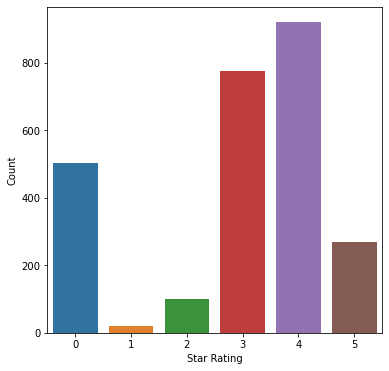

In [60]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['Star Rating'])
plt.ylabel("Count")
plt.show()

A lot of hotels were awarded a star rating of 5.

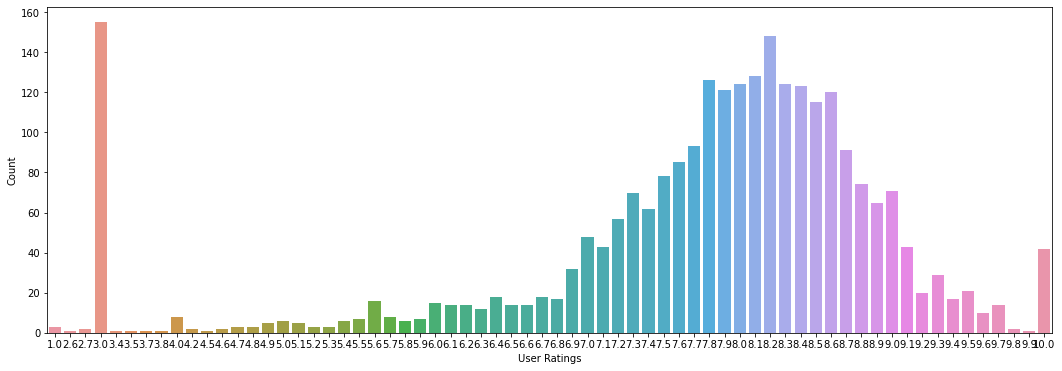

In [61]:
# Plotting barplots
plt.figure(figsize=(18,6))
sns.countplot(data=hotel_data, x=hotel_data['User Ratings'])
plt.ylabel("Count")
plt.show()

Most of the hotels were rated 3 by users followed by 8.5 and 8.0. There were considerable number of hotels with user rating of 10 suggesting that these hotels do provide their customers with top notch facilities.

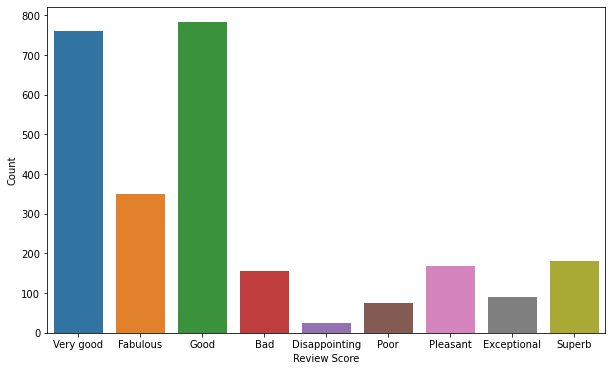

In [62]:
# Plotting barplots
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_data, x=hotel_data['Review Score'])
plt.ylabel("Count")
plt.show()

Most of the hotels are in the Good and Very good category.

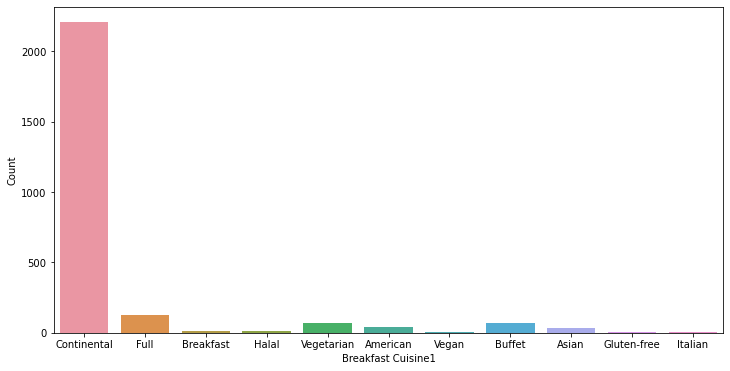

In [63]:
# Plotting barplots
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_data, x=hotel_data['Breakfast Cuisine1'])
plt.ylabel("Count")
plt.show()

Most of the hotels rovide Continental breakfast to their guests.

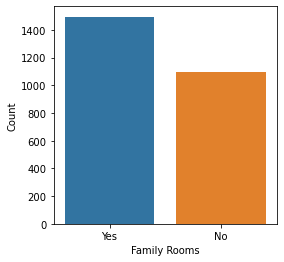

In [64]:
# Plotting barplots
plt.figure(figsize=(4,4))
sns.countplot(data=hotel_data, x=hotel_data['Family Rooms'])
plt.ylabel("Count")
plt.show()

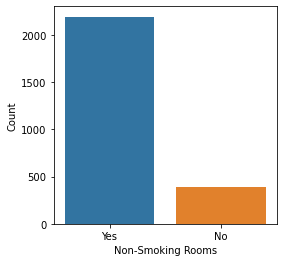

In [65]:
# Plotting barplots
plt.figure(figsize=(4,4))
sns.countplot(data=hotel_data, x=hotel_data['Non-Smoking Rooms'])
plt.ylabel("Count")
plt.show()

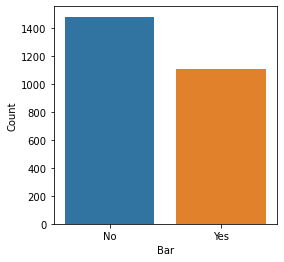

In [66]:
# Plotting barplots
plt.figure(figsize=(4,4))
sns.countplot(data=hotel_data, x=hotel_data['Bar'])
plt.ylabel("Count")
plt.show()

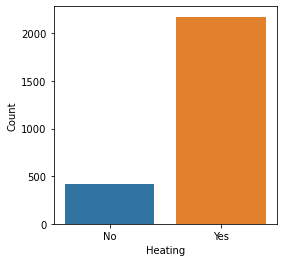

In [67]:
# Plotting barplots
plt.figure(figsize=(4,4))
sns.countplot(data=hotel_data, x=hotel_data['Heating'])
plt.ylabel("Count")
plt.show()

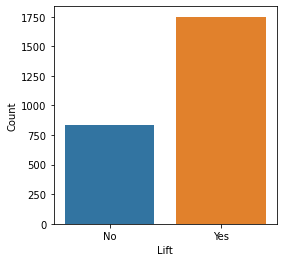

In [68]:
# Plotting barplots
plt.figure(figsize=(4,4))
sns.countplot(data=hotel_data, x=hotel_data['Lift'])
plt.ylabel("Count")
plt.show()

From the above graphs, we can say that most hotel provide basic ammenities like non-smoking rooms, bar, lift, family rooms.

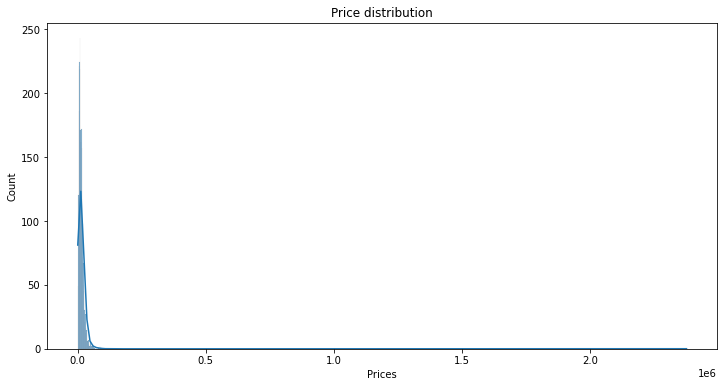

In [69]:
# plotting the Prices
plt.figure(figsize=(12,6))
sns.histplot(hotel_data['Prices'], kde=True)
plt.title("Price distribution")
plt.show()

Most of the hotels charges less than 20000 for a night. Some hotels charge as high as 100000 INR for a night.

checking how price is affected by diffenr features.

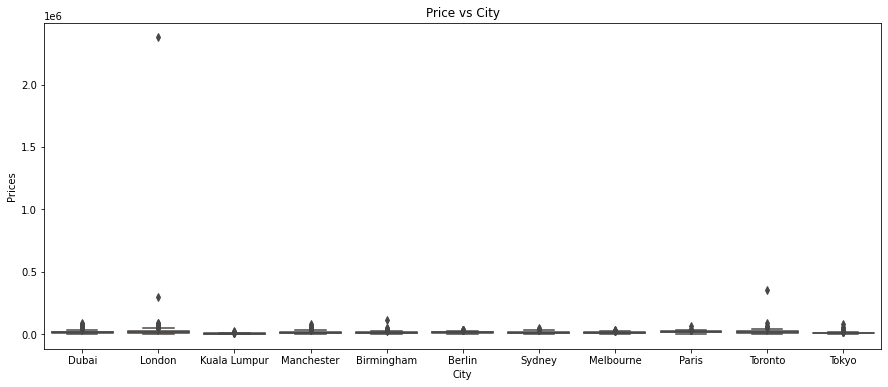

In [70]:
# lets check for price in different cities

plt.figure(figsize=(15,6))
sns.boxplot(data=hotel_data, x='City', y='Prices')
plt.title("Price vs City")
plt.show()

We can see that almost every city other than Dubai have outliers meaning there maybe some hotels in those citites which charges more than others.

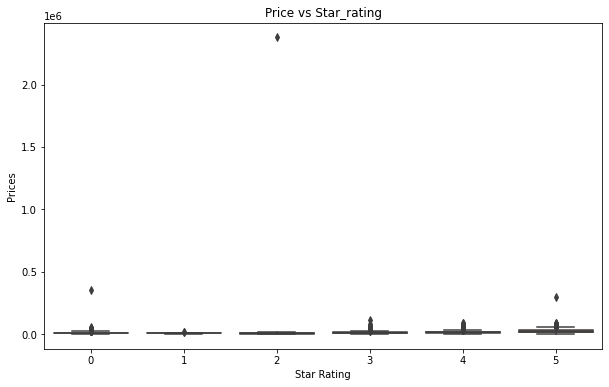

In [71]:
# lets check for price in vs star rating

plt.figure(figsize=(10,6))
sns.boxplot(data=hotel_data, y='Prices', x='Star Rating')
plt.title("Price vs Star_rating")
plt.show()

1. The presence of outliers suggests that there are exceptional cases where a hotel's price is notably different from the norm for its star rating.
2. Outliers in higher-rated hotels (e.g., 5-star) may represent luxury or premium hotels with significantly higher prices, while outliers in lower-rated hotels might be budget hotels with unusually high prices.
3. There's variation in prices within each star rating, which means that factors other than just star rating contribute to hotel prices.
4. There might be some overlap in prices within each star rating category, as indicated by the height of the boxes.

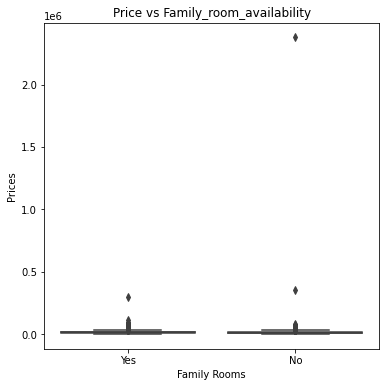

In [72]:
# lets check for price vs family room

plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='Family Rooms')
plt.title("Price vs Family_room_availability")
plt.show()

The boxplot provides a visual representation of the distribution of hotel prices for hotels with and without family rooms.
Hotel that do not have family rooms have higher number of outliers suggesting some exceptional cases of high prices.

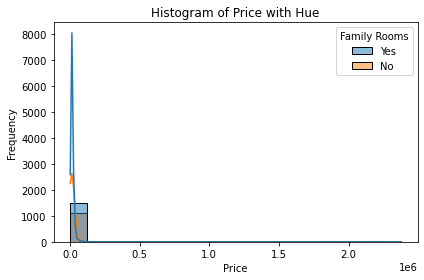

In [73]:
# lets  Create a histogram with family rooms as the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='Family Rooms', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

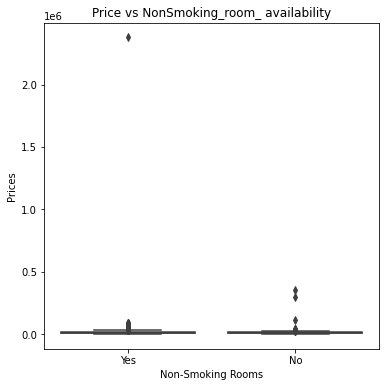

In [74]:
# plotting price vs Non-smoking room
plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='Non-Smoking Rooms')
plt.title("Price vs NonSmoking_room_ availability")
plt.show()

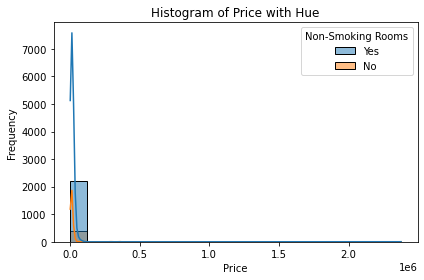

In [75]:
# lets  Create a histogram with as non smoking rooms the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='Non-Smoking Rooms', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

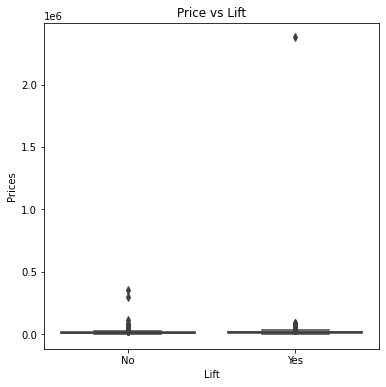

In [76]:
# plotting price vs lift availability
plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='Lift')
plt.title("Price vs Lift")
plt.show()

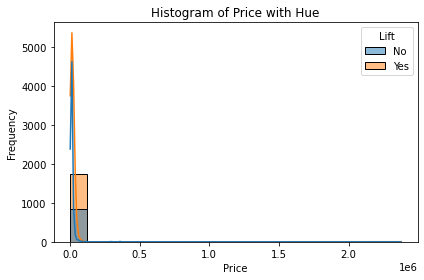

In [77]:
# lets  Create a histogram with as Lift the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='Lift', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

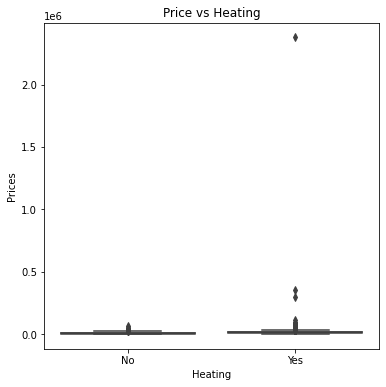

In [78]:
# plotting price vs Heating
plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='Heating')
plt.title("Price vs Heating")
plt.show()

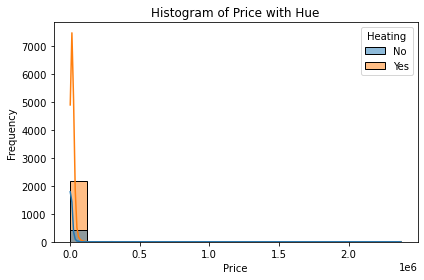

In [79]:
# lets  Create a histogram with heating as the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='Heating', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

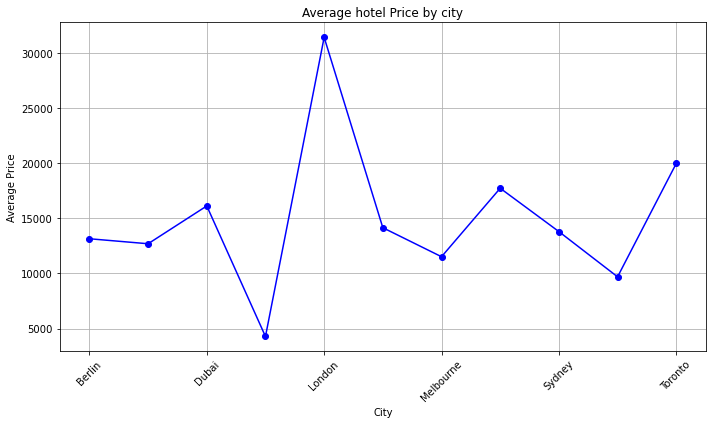

In [80]:
# Plotting the average price across cities

plt.figure(figsize=(10, 6))
hotel_data.groupby('City')['Prices'].mean().plot(marker='o', linestyle='-', color='b')

plt.title('Average hotel Price by city')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

London seems to be expensive.

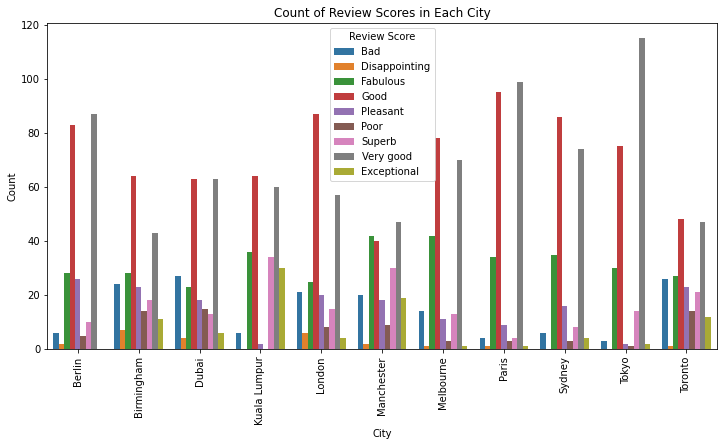

In [81]:
# Calculate the count of each review score in each city
data = hotel_data.groupby(['City', 'Review Score'])['Review Score'].count().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='City', y='Count', hue='Review Score')
plt.title('Count of Review Scores in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

This plot allows us to see the distribution of different review score categories, such as 'Good,' 'Very good,' 'Excellent,' and so on, within each city.

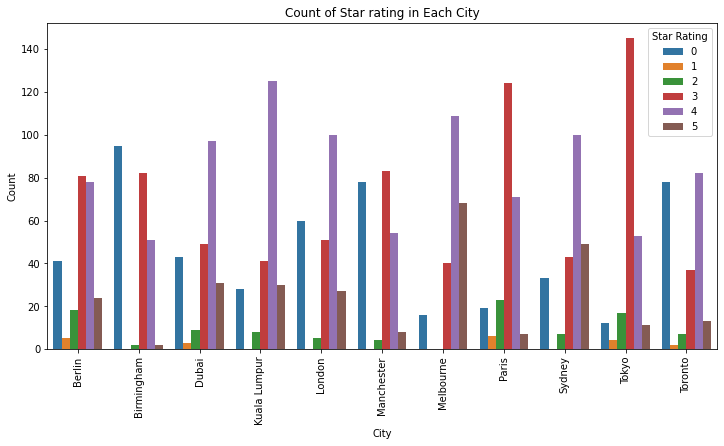

In [82]:
# Calculate the count of each review score in each city
data = hotel_data.groupby(['City', 'Star Rating'])['Star Rating'].count().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='City', y='Count', hue='Star Rating')
plt.title('Count of Star rating in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

The plot allows you to see the distribution of different star rating within each city.

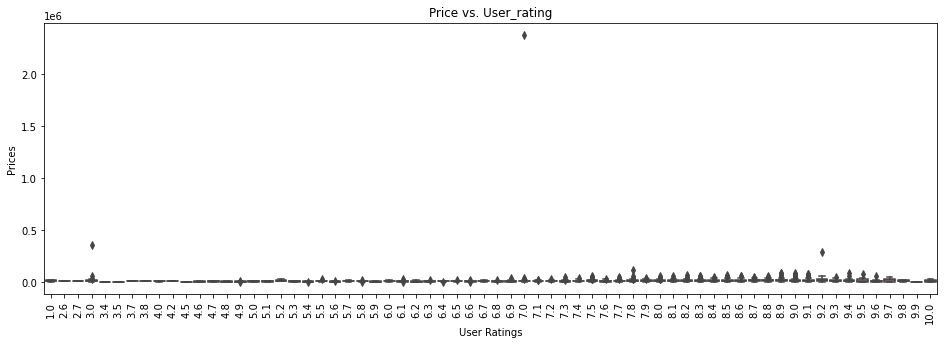

In [83]:
# AveragePrice vs. region
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
sns.boxplot(data=hotel_data, x='User Ratings', y='Prices')
plt.title('Price vs. User_rating')

plt.show()

In [84]:
# Find the most expensive hotel in each city along with its price
most_expensive_hotels = hotel_data.loc[hotel_data.groupby('City')['Prices'].idxmax()][['City', 'Hotel Name', 'Prices']]

# Convert Prices column to integers for sorting
most_expensive_hotels['Prices'] = most_expensive_hotels['Prices'].astype(int)

# Sort the result in descending order by price
most_expensive_hotels = most_expensive_hotels.sort_values(by='Prices', ascending=False)

# Display the most expensive hotels in each city
print(most_expensive_hotels)

              City                                         Hotel Name   Prices
253         London  Brand new studio flat in the heart of Notting ...  2377105
2441       Toronto                      Full Apartment at Redpath Ave   356114
1140    Birmingham                                    Berkshire stays   116178
46           Dubai                     Address Beach Resort Residence    87140
792     Manchester      The Ultimate Hen Suite with Bar & Makeup Room    82739
2634         Tokyo                                The Peninsula Tokyo    80456
2098         Paris                                    Hôtel San Régis    64289
1567        Sydney                                           W Sydney    44739
1270        Berlin            Schlosshotel Berlin by Patrick Hellmann    35491
1909     Melbourne            Quiet CBD 3b2b apartment + free parking    31618
714   Kuala Lumpur                                Star At KLCC by FZB    21289


In [85]:
# Find the hotel in each city with highest user rating
most_rated_hotels = hotel_data.loc[hotel_data.groupby('City')['User Ratings'].idxmax()][['City', 'Hotel Name', 'User Ratings']]

# Convert Prices column to integers for sorting
most_rated_hotels['User Ratings'] = most_rated_hotels['User Ratings'].astype(int)

# Sort the result in descending order by price
most_rated_hotels = most_rated_hotels.sort_values(by='User Ratings', ascending=False)

# Display the most expensive hotels in each city
print(most_rated_hotels)

              City                                         Hotel Name  \
1070    Birmingham  Charming West Midlands Escape – Strategic Loca...   
24           Dubai                                 Bee Capsule Hostel   
502   Kuala Lumpur                 Platinum Suites KLCC BY by CLASSIC   
411         London  Stunning Serviced Room Crystal Palace London SE20   
814     Manchester                  1 Bed Apartment near Old Trafford   
1590        Sydney   2 Bedroom Apartment - Darling Harbour - Queen St   
2283       Toronto                                   Yorkville suites   
1325        Berlin                         Locke at East Side Gallery   
1909     Melbourne            Quiet CBD 3b2b apartment + free parking   
2040         Paris  Luxurious 2 Bedroom Arc de Triomphe Dôme Free ...   
2671         Tokyo              Grand Prince Hotel Takanawa Hanakohro   

      User Ratings  
1070            10  
24              10  
502             10  
411             10  
814             10

In [86]:
# Find the hotel in each city with highest numbr of reviews
most_reviewed_hotels = hotel_data.loc[hotel_data.groupby('City')['Number of Reviews'].idxmax()][['City', 'Hotel Name', 'Number of Reviews']]

# Convert Prices column to integers for sorting
most_reviewed_hotels['Number of Reviews'] = most_reviewed_hotels['Number of Reviews'].astype(int)

# Sort the result in descending order by price
most_reviewed_hotels = most_reviewed_hotels.sort_values(by='Number of Reviews', ascending=False)

# Display the most expensive hotels in each city
print(most_reviewed_hotels)

              City                                         Hotel Name  \
386         London                          Zedwell Piccadilly Circus   
756     Manchester             Britannia Hotel City Centre Manchester   
120          Dubai                                        Atana Hotel   
1263        Berlin         Park Inn by Radisson Berlin Alexanderplatz   
2029         Paris          HotelF1 Paris Saint Ouen Marché Aux Puces   
1648        Sydney                                    The Grace Hotel   
1011    Birmingham                      ibis budget Birmingham Centre   
1762     Melbourne                                 The Victoria Hotel   
2533         Tokyo  The Royal Park Hotel Tokyo Haneda Airport Term...   
683   Kuala Lumpur                        Traders Hotel, Kuala Lumpur   
2266       Toronto                              Chelsea Hotel Toronto   

      Number of Reviews  
386               28907  
756               21540  
120               21214  
1263              1

In [87]:
# using label encoder to convert categorical column to numerical in dataset
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns in your dataset
cat_columns = ['City','Review Score','Family Rooms', 'Non-Smoking Rooms', 'Bar', 'Heating', 'Lift', 'Breakfast Cuisine1', 'Room Type']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_columns:
    hotel_data[col] = label_encoder.fit_transform(hotel_data[col])

# Display the updated dataset
hotel_data.head()

,Hotel Name,City,Location,Number of Reviews,User Ratings,Star Rating,Review Score,Family Rooms,Non-Smoking Rooms,Bar,Heating,Lift,Breakfast Cuisine1,Room Type,Prices
0,Days Hotel By Wyndham Dubai Deira,2,One Deira Plaza Gold Souk Metro Station Al Cor...,4049.0,8.1,3,8,1,1,0,0,0,4,671,10069.0
1,Four Points by Sheraton Sheikh Zayed Road,2,"Sheikh Zayed Road, Trade Centre, Dubai, United...",2926.0,8.4,4,8,1,1,1,0,1,4,114,29443.0
2,1 World Dubai,2,King Salman Bin Abdulaziz Al Saud Street Elite...,695.0,8.6,0,3,0,1,0,1,1,4,490,6772.0
3,"Holiday Inn Express Dubai Airport, an IHG Hotel",2,"Airport Road, Garhoud, 35257 Dubai, United Ara...",16649.0,7.8,3,4,0,1,1,0,1,4,241,11302.0
4,One bedroom apartment with amazing pool view i...,2,"Apartment no 902, Building name tower 108, JVC...",0.0,3.0,0,0,1,0,0,1,1,4,410,13249.0


In [88]:
hotel_data.drop(['Hotel Name', 'Location'], axis=1, inplace=True)
hotel_data.head()

,City,Number of Reviews,User Ratings,Star Rating,Review Score,Family Rooms,Non-Smoking Rooms,Bar,Heating,Lift,Breakfast Cuisine1,Room Type,Prices
0,2,4049.0,8.1,3,8,1,1,0,0,0,4,671,10069.0
1,2,2926.0,8.4,4,8,1,1,1,0,1,4,114,29443.0
2,2,695.0,8.6,0,3,0,1,0,1,1,4,490,6772.0
3,2,16649.0,7.8,3,4,0,1,1,0,1,4,241,11302.0
4,2,0.0,3.0,0,0,1,0,0,1,1,4,410,13249.0


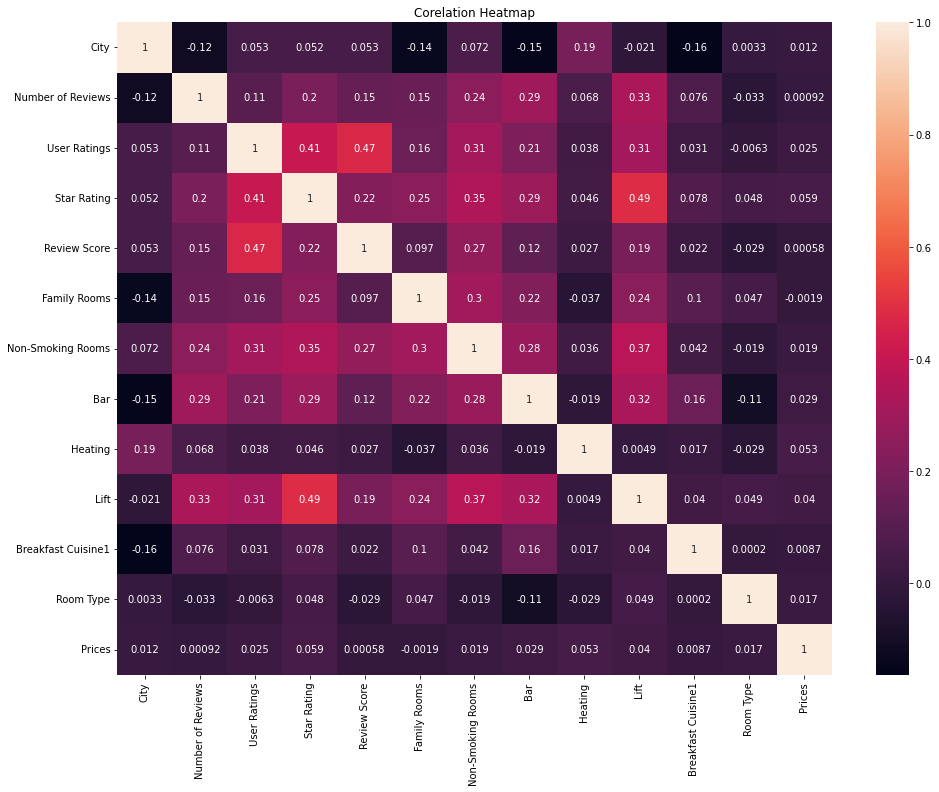

In [89]:
# lets check for correlation among columns

plt.figure(figsize=(16,12))
sns.heatmap(hotel_data.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [90]:
# lets check the correlation of features with the target variable here we have 2 target variables, Prices and Reviewscore
hotel_data.corr()['Prices'].sort_values()

Family Rooms         -0.001907
Review Score          0.000576
Number of Reviews     0.000917
Breakfast Cuisine1    0.008749
City                  0.011786
Room Type             0.016560
Non-Smoking Rooms     0.018731
User Ratings          0.025217
Bar                   0.028684
Lift                  0.039769
Heating               0.052526
Star Rating           0.059137
Prices                1.000000
Name: Prices, dtype: float64

'Prices' has the highest positive correlation with 'Star Rating' (0.059137) and 'Heating' (0.052526). This suggests that the presence of Star Rating and Heating in hotels may be associated with higher prices. It also has positive correlations with 'Lift' (0.039769) and 'Bar' (0.028684). These variables may have some influence on hotel prices.

The 'Prices' column has a weak negative correlation with 'Family Rooms' (-0.146498). This indicates that as prices increase, there is a slight negative correlation with Family Rooms. In other words, higher prices are associated with slightly lower Family Rooms.'Prices' has a very weak positive correlation with 'Review Score' (0.000576), and 'Number of Reviews' (0.000917). These correlations suggest that these factors have limited influence on hotel prices.

In [91]:
hotel_data.corr()['Review Score'].sort_values()

Room Type            -0.029028
Prices                0.000576
Breakfast Cuisine1    0.021795
Heating               0.026722
City                  0.052760
Family Rooms          0.096559
Bar                   0.119116
Number of Reviews     0.145888
Lift                  0.191690
Star Rating           0.223849
Non-Smoking Rooms     0.266791
User Ratings          0.470142
Review Score          1.000000
Name: Review Score, dtype: float64

The 'Reviewscore' column has the strongest positive correlation with 'User Ratings' (0.470142) and 'Non-Smoking Rooms' (0.266791). This suggests that higher user ratings and more reviews are positively correlated with a higher review score.

On the other hand, 'Reviewscore' has a weak positive correlation with 'Prices' (0.000576), indicating that the availability of Prices is also positively associated with a higher review score.

#### Predicting the price is an example of Regression problem.

In [92]:
# For regression, price is the target column

X= hotel_data.drop(['Prices'], axis=1)
y = hotel_data['Prices']

In [93]:
#lets check for skewness and outliers in the dataset
X.skew().sort_values()

Non-Smoking Rooms    -1.937760
Heating              -1.860799
User Ratings         -1.855200
Star Rating          -0.864126
Lift                 -0.752264
Family Rooms         -0.313738
Room Type            -0.268052
Review Score         -0.183574
City                 -0.006294
Bar                   0.289754
Breakfast Cuisine1    2.320316
Number of Reviews     3.419698
dtype: float64

In [94]:
# remove skewness

# Identify the columns to transform
columns_to_transform = ['Non-Smoking Rooms', 'Heating', 'User Ratings', 'Number of Reviews', 'Breakfast Cuisine1']

# Apply log transformation to selected columns
for column in columns_to_transform:
    X[column] = np.log1p(X[column])

In [95]:
X.skew().sort_values()

Breakfast Cuisine1   -2.863118
User Ratings         -2.535026
Non-Smoking Rooms    -1.937760
Heating              -1.860799
Number of Reviews    -0.877720
Star Rating          -0.864126
Lift                 -0.752264
Family Rooms         -0.313738
Room Type            -0.268052
Review Score         -0.183574
City                 -0.006294
Bar                   0.289754
dtype: float64

In [96]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

The values in the dataset that are outside these thresholds are outliers. Since this dataset is small, we will transform these outliers using flooring or capping method. In this method, a threshold is set and values above or below that threshold is replaced with the nearest non-outlying value, in this case the threshold.

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1941, 12)
X_test shape (648, 12)
y_train shape (1941,)
y_test shape (648,)


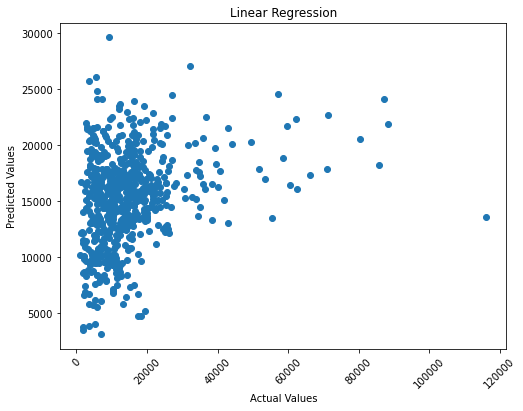

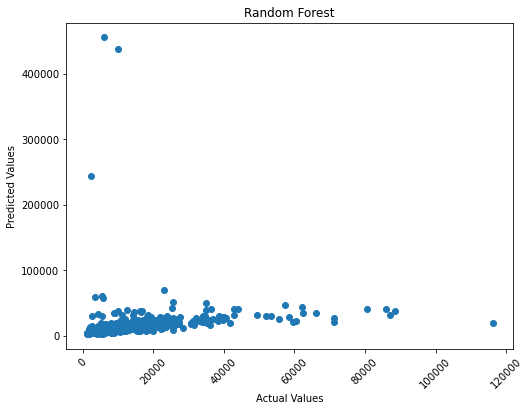

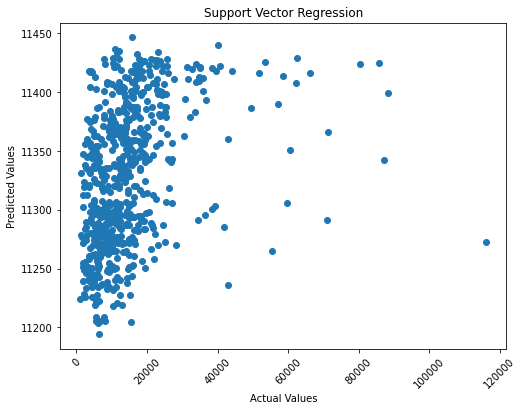

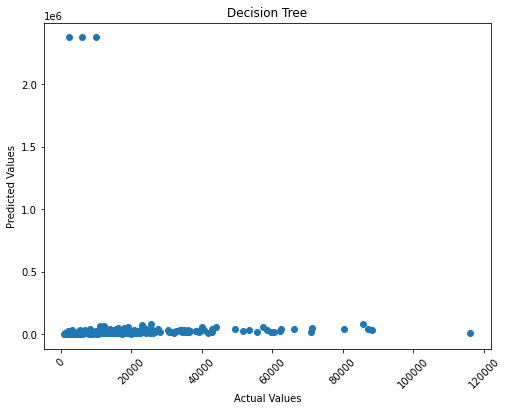

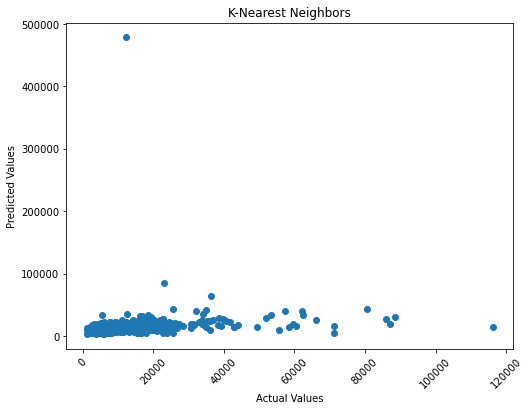

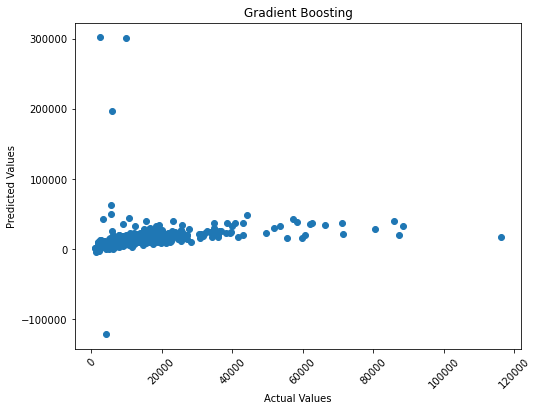

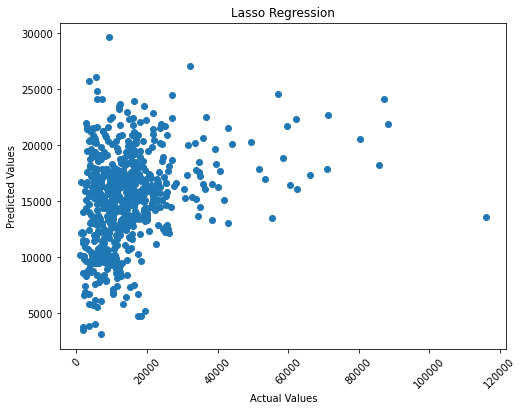

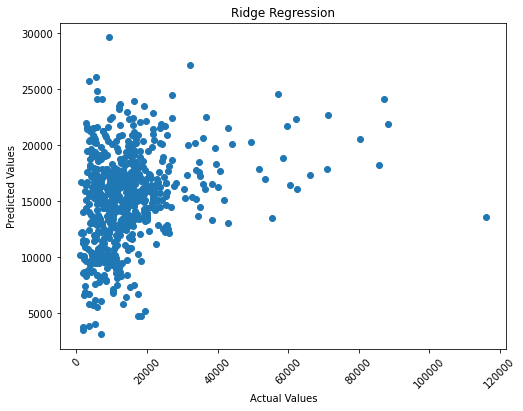

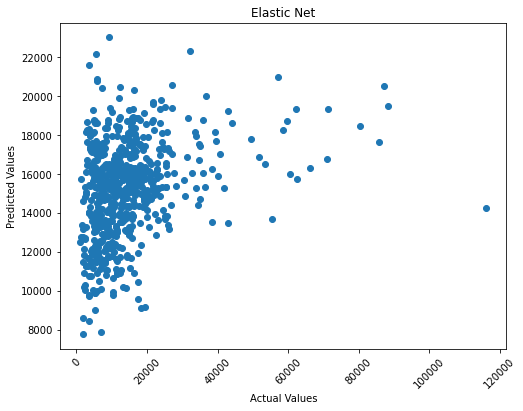

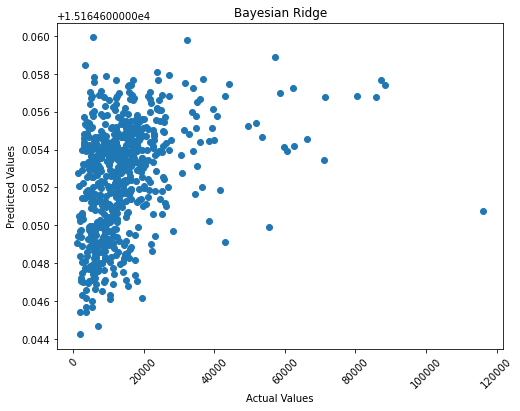

In [98]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Elastic Net', ElasticNet()),
    ('Bayesian Ridge', BayesianRidge())]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))
    
# Plotting the predicted vs actual values
for name, y_pred in predictions:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.show()

In [99]:
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,0.071782,1.424598e+08,11935.652347,7638.592259
1,Random Forest,-4.127012,7.868771e+08,28051.329213,7278.648822
2,Support Vector Regression,-0.060929,1.628280e+08,12760.405996,7449.158921
3,Decision Tree,-169.407810,2.615363e+10,161720.848276,17481.072821
4,K-Nearest Neighbors,-1.990550,4.589798e+08,21423.814654,7143.185780
5,Gradient Boosting,-1.927906,4.493655e+08,21198.242444,6756.341432
6,Lasso Regression,0.071810,1.424555e+08,11935.474070,7638.269299
7,Ridge Regression,0.071846,1.424500e+08,11935.241742,7638.003487
8,Elastic Net,0.079334,1.413008e+08,11887.000186,7518.042015
9,Bayesian Ridge,-0.003143,1.539591e+08,12408.027115,7950.037723


The Elastic Net model stands out as the top performer based on these metrics, with the highest R² score and the lowest MSE, RMSE, and MAE. It appears to be the most suitable model for this dataset.

In [100]:
# using cross val score on the regressors
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv=5)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Diffrenece between Mean CV Score and R2 score", (r2_score(y_test,y_pred)-cv_score.mean()))
    print("\n")

Model : Linear Regression
cv_score : [-0.00699007 -1.43618818  0.18571742  0.09534683  0.00779172]
Mean Score -0.23086445538972006
Diffrenece between Mean CV Score and R2 score 0.2277212352817219


Model : Random Forest
cv_score : [-6.00224764e-03 -1.88874193e+01 -1.40496173e+00 -2.32503381e+00
 -1.92232568e+00]
Mean Score -4.909148554437015
Diffrenece between Mean CV Score and R2 score 4.906005334329016


Model : Support Vector Regression
cv_score : [-0.01152374 -0.07538493 -0.03788316 -0.24470411 -0.03148693]
Mean Score -0.0801965729813137
Diffrenece between Mean CV Score and R2 score 0.07705335287331554


Model : Decision Tree
cv_score : [-1.34834658e-02 -4.18001895e+02 -8.57176953e-01 -6.26486453e-02
 -4.25982543e-01]
Mean Score -83.87223723696293
Diffrenece between Mean CV Score and R2 score 83.86909401685493


Model : K-Nearest Neighbors
cv_score : [-4.79621792e-03 -2.27233153e+01 -1.06575296e+01 -9.35822726e+00
 -1.16530697e+00]
Mean Score -8.781835073435275
Diffrenece between M

In this context, the model with the lowest difference between the mean CV score and R2 score is often a good starting point for hyperparameter tuning because it indicates that the model's performance on cross-validation is consistent with its performance on the test data. However, the choice of the "best" model might also depend on other factors such as the complexity of the model, interpretability, and the specific goals of your project.

From the above information, it seems that the "Elastic Net" model has the lowest difference between the mean CV score and R2 score, with a difference of approximately 0.0954. This suggests that Elastic Net is a relatively stable model in terms of generalization

In [101]:
# Sample data 
X= hotel_data.drop(['Prices'], axis=1)
y = hotel_data['Prices']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Elastic Net model
alpha = 1.0  # The regularization strength, adjust as needed
l1_ratio = 0.5  # The mixing parameter between L1 and L2 regularization, adjust as needed
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model on the training data
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

R2 Score: 0.08438077076192596
Mean Squared Error: 150561800.47869536
Root Mean Squared Error: 12270.36268733306
Mean Absolute Error: 7698.523362673948


In [102]:
import joblib

# Save the model to the file
joblib.dump(elastic_net_model, "Hotel_prices.pkl")

['Hotel_prices.pkl']

#### Predicting the review score is a classification problem

In [103]:
# for classification, region is the target variable
X_c = hotel_data.drop(['Review Score'], axis=1)
y = hotel_data['Review Score']

In [104]:
# checking and correcting skewness
X_c.skew().sort_values()

Non-Smoking Rooms     -1.937760
Heating               -1.860799
User Ratings          -1.855200
Star Rating           -0.864126
Lift                  -0.752264
Family Rooms          -0.313738
Room Type             -0.268052
City                  -0.006294
Bar                    0.289754
Breakfast Cuisine1     2.320316
Number of Reviews      3.419698
Prices                45.259047
dtype: float64

In [105]:
# finding and transforming outliers
# Iterate over each column in X
for col in X_c.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X_c[col], 25)
    Q3 = np.percentile(X_c[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X_c[col] = np.where(X_c[col] < lower_threshold, lower_threshold, X_c[col])
    X_c[col] = np.where(X_c[col] > upper_threshold, upper_threshold, X_c[col])

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X_c)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1941, 12)
X_test shape (648, 12)
y_train shape (1941,)
y_test shape (648,)


In [107]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100)),
    ('SVC', SVC()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=100)),
    ('LogisticRegression', LogisticRegression())]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print()

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)
    
print(scores_df)


Model:  KNeighborsClassifier()
[[ 26   0   0   0   2   2   5   0   0]
 [  4   0   0   0   1   2   3   0   0]
 [  0   0   7   1   0   0   0   6   2]
 [  0   0   1  32   3   0   0   6  42]
 [  1   0   0   7 155   2   0   0  37]
 [  4   0   0   0  19  12   0   0   1]
 [ 11   0   0   0   2   3   1   0   0]
 [  0   0   8  25   0   0   0  20   3]
 [  0   0   2  25  44   0   0   1 120]]

Model:  DecisionTreeClassifier()
[[ 35   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   8   0   0]
 [  0   0  16   0   0   0   0   0   0]
 [  0   0   0  84   0   0   0   0   0]
 [  0   0   0   0 202   0   0   0   0]
 [  0   0   0   0   0  36   0   0   0]
 [  0   7   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0   0  56   0]
 [  0   0   0   0   0   0   0   0 192]]

Model:  RandomForestClassifier()
[[ 35   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   9   0   0]
 [  0   0  15   0   0   0   0   1   0]
 [  0   0   0  83   0   0   0   1   0]
 [  0   0   0   0 202   0   0   0   0]
 [

DecisionTree, RandomForest, GradientBoosting, or Bagging consistently exhibit high performance across multiple evaluation metrics.

In [108]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_c, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.28378378 0.25096525 0.33204633 0.26447876 0.26112186]
Mean Score 0.2784791976281338
Difference between accuracy and cv score is:  0.5671998147175452


Model : DecisionTree
cv_score : [0.97490347 0.97683398 0.98455598 0.98069498 0.99226306]
Mean Score 0.9818502946162522
Difference between accuracy and cv score is:  -0.13617128227057318


Model : RandomForest
cv_score : [0.96911197 0.98648649 0.96911197 0.96718147 0.97098646]
Mean Score 0.9725756704480109
Difference between accuracy and cv score is:  -0.12689665810233186


Model : AdaBoost
cv_score : [0.71814672 0.72007722 0.72007722 0.72007722 0.72147002]
Mean Score 0.7199696795441477
Difference between accuracy and cv score is:  0.1257093328015313


Model : SVC
cv_score : [0.28957529 0.33976834 0.35328185 0.37451737 0.28820116]
Mean Score 0.3290688035368886
Difference between accuracy and cv score is:  0.5166102088087904


Model : GradientBoosting
cv_score : [0.98069498 0.98455598 0.97490347 0.98455598 

GradientBoosting, DecisionTree, RandomForest, and Bagging appear to be strong models for the best model.


"DecisionTree" model is the best performing model among all. Here are the key reasons for selecting the DecisionTree model:

High Accuracy: The DecisionTree model has an accuracy of 97.83%, which is the highest among the models you've tested. This indicates that it correctly predicts the classes for most of the samples.

High F1 Score: The F1 Score, which is a balance between precision and recall, is also very high at 97.65%. This means the model achieves a good balance between minimizing false positives and false negatives.

High Precision: The precision of the DecisionTree model is 97.51%, indicating that when it predicts a class, it is often correct.

High Recall: The recall of the DecisionTree model is 97.83%, which indicates that the model captures most of the positive samples.

Stability: The model has a relatively small difference between accuracy and cross-validation scores i.e. -0.13269, which suggests stability.

In [109]:
#hyperparameter tuning

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameters to search through
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [110]:
# final model
final = DecisionTreeClassifier(max_depth=20 ,min_samples_leaf=1 ,min_samples_split=2)
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, final_pred))

Accuracy :  0.9768518518518519


In [111]:
# saving the model
import joblib
joblib.dump(final, "Hotel_reviewscore.pkl")

['Hotel_reviewscore.pkl']